In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ThomPijnenburg/Data-Analytics-Ecommerce-Linear-Regression/master/Ecommerce%20Customers')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df['Avatar'].value_counts()

SlateBlue         7
Cyan              7
CadetBlue         7
Teal              7
GreenYellow       7
                 ..
PaleGoldenRod     1
CornflowerBlue    1
PaleTurquoise     1
MediumPurple      1
NavajoWhite       1
Name: Avatar, Length: 138, dtype: int64

In [ ]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

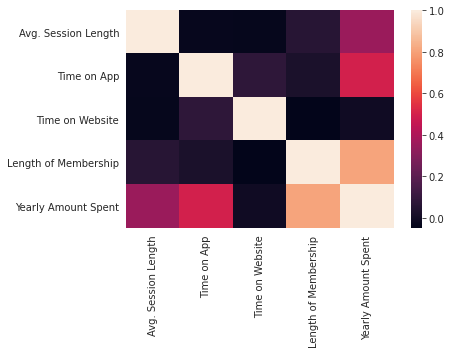

In [ ]:
sns.heatmap(data=df.corr())

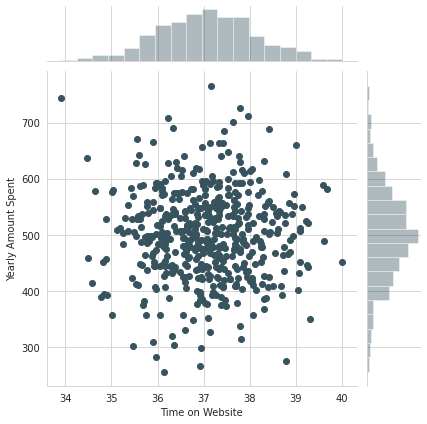

In [ ]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

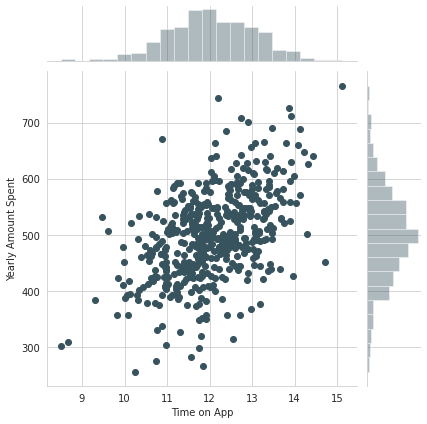

In [ ]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

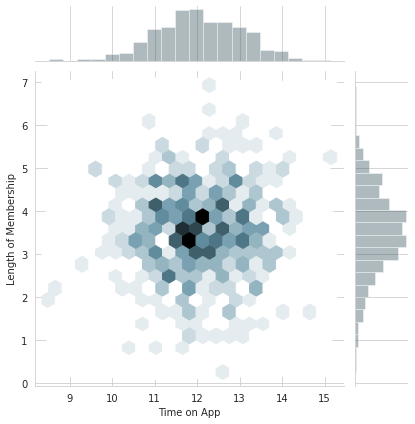

In [ ]:
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

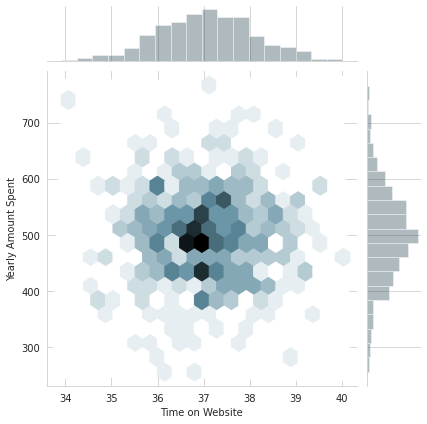

In [ ]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='hex')

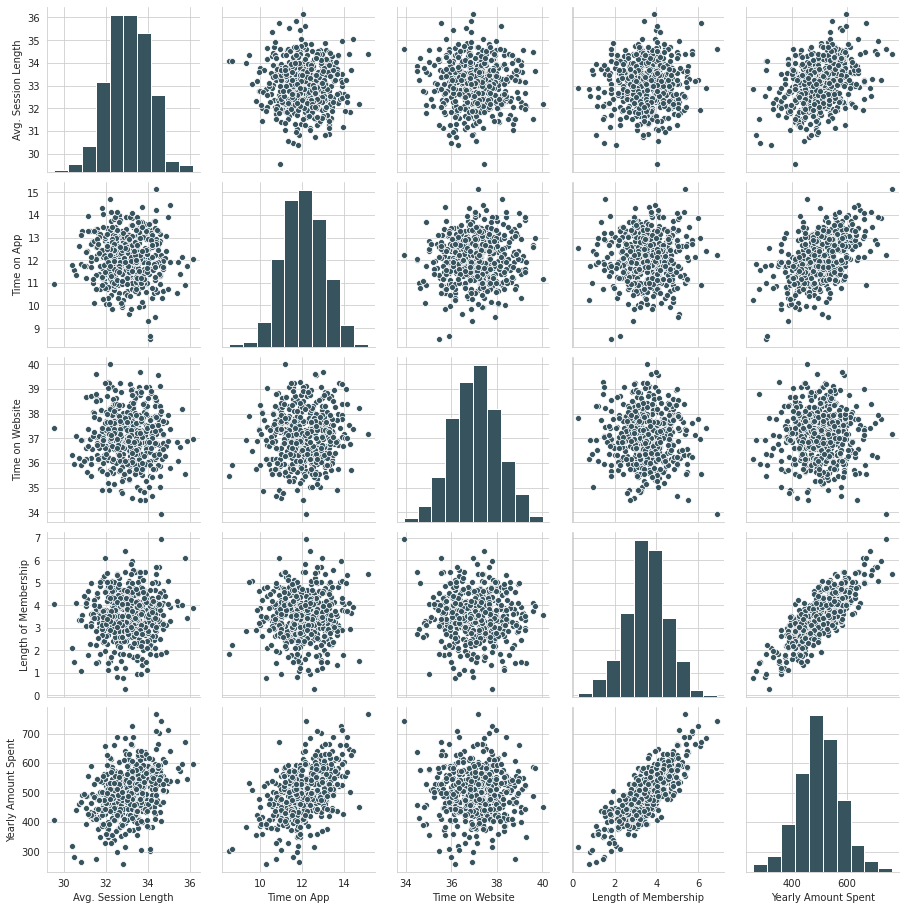

In [ ]:
sns.pairplot(df)

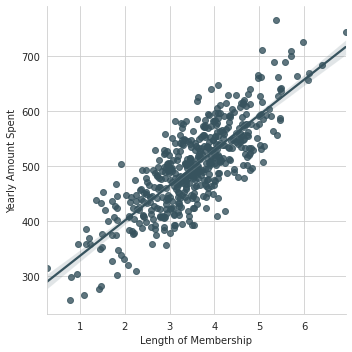

In [ ]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df)

In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
X=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [ ]:
Y=df['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(400, 4)

In [ ]:
Y_train.shape

(400,)

In [ ]:
X_test.shape

(100, 4)

In [ ]:
Y_test.shape

(100,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
lm.fit(X_test,Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Session Length,25.615907
Time on App,38.055366
Time on Website,0.869366
Length of Membership,61.976643


In [ ]:
lm.coef_

array([25.61590741, 38.05536636,  0.86936588, 61.97664263])

In [ ]:
lm.intercept_

-1058.734258155751

In [ ]:
predictions = lm.predict(X_test)

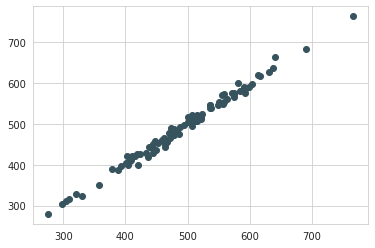

In [ ]:
plt.scatter(Y_test,predictions)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 6.756423953031732
MSE: 73.5399000618972
RMSE: 8.575540802882184


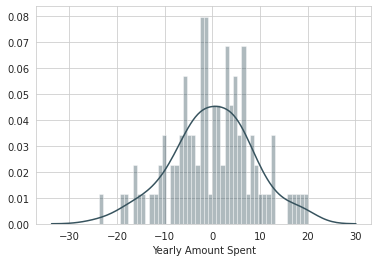

In [ ]:
sns.distplot((Y_test-predictions),bins=50);

In [ ]:
#Scaling the X part of data
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler() # defining object
scalar.fit(X_train) #defining the scal
X_train_s=scalar.transform(X_train)#actual scaling
X_test_s=scalar.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_s, Y_train) #calculates B0 and B1
y_pred_train=linreg.predict(X_train_s)
y_pred_tets=linreg.predict(X_test_s)

In [ ]:
#print b0 and b1
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 69.70537285017656
Coefficients: [170.39092298 241.16043419   1.56172478 409.09358666]


In [ ]:
#finding RMSE values
from sklearn import metrics
RMSE_train=np.sqrt(metrics.mean_squared_error(Y_train,y_pred_train))
RMSE_train

10.186528734261396

In [ ]:

from sklearn.metrics import r2_score
r2=r2_score(Y_test, y_pred_tets)
r2

0.989288813400233

In [ ]:
coeff_df2 = pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficients'])
coeff_df2

,Coefficients
Avg. Session Length,170.390923
Time on App,241.160434
Time on Website,1.561725
Length of Membership,409.093587


In [ ]:
coeff_df

,Coefficients
Avg. Session Length,25.615907
Time on App,38.055366
Time on Website,0.869366
Length of Membership,61.976643


## From the above co-officients we can deduce that the revenue generated from Mobile app is more than the time spent on the website.

## On the other hand, We can say that the turnover from website is poor and the website needs improvement.

## But the decision depends on the business question
